In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from PIL import Image
from google.colab import files
from pathlib import Path
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image

# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             validation_split=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_ds = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123
)

validation_ds = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train',
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123
)


test_ds = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/test_mixed',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train'

In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

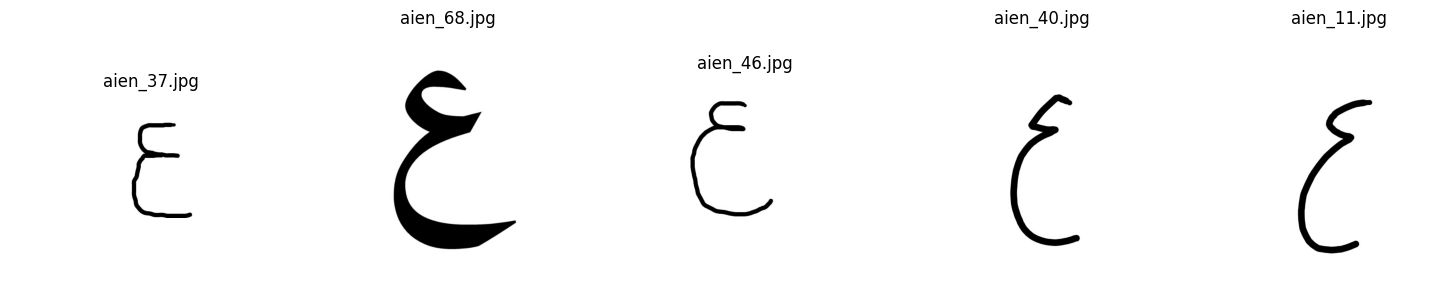

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train/ain"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

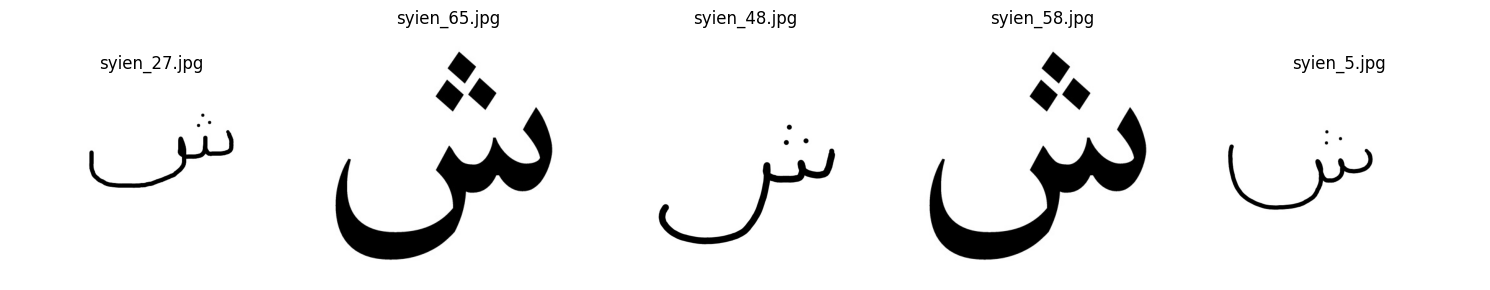

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train/syin"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

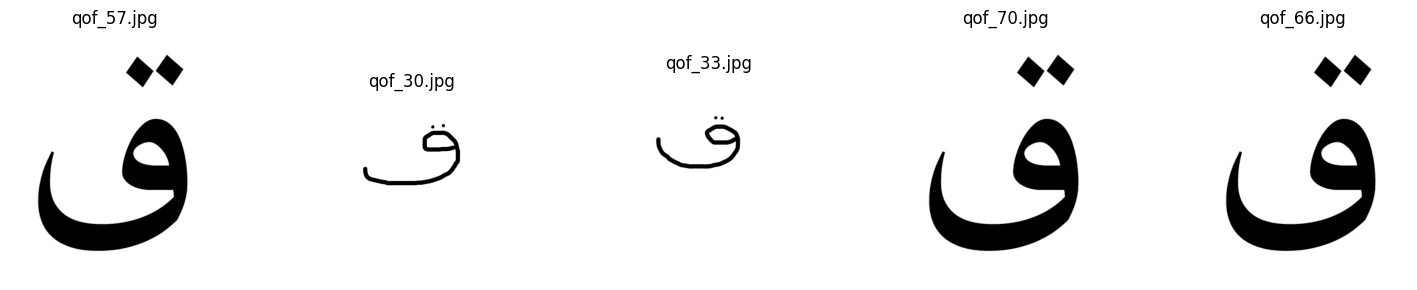

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train/qof"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
# Load the pre-trained MobileNetV2 base model
MobileNetV2_base = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Create input layer
inputs = Input(shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Add the pre-trained MobileNetV2 base model
x = MobileNetV2_base(inputs, training=False)

# Flatten the output
x = Flatten()(x)

# Add a dense layer with 512 units and ReLU activation function
x = Dense(512, activation='relu')(x)

# Add Dropout layer with 0.4 dropout rate
x = Dropout(0.4)(x)

# Add the output layer with 30 units and softmax activation function for multi-class classification
outputs = Dense(30, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 30)                15390     
                                                             

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stop, Akurasi mencapai target")
      self.model.stop_training = True;

mycallback = myCallback()

In [ ]:
%%time
# # Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=50,
    callbacks=[early_stopping, mycallback]
)

Epoch 1/50
54/54 [==============================] - 755s 13s/step - loss: 2.1128 - accuracy: 0.4165 - val_loss: 0.6434 - val_accuracy: 0.7820
Epoch 2/50
54/54 [==============================] - 32s 591ms/step - loss: 0.5222 - accuracy: 0.8232 - val_loss: 0.3182 - val_accuracy: 0.8981
Epoch 3/50
54/54 [==============================] - 31s 571ms/step - loss: 0.2413 - accuracy: 0.9284 - val_loss: 0.1475 - val_accuracy: 0.9479
Epoch 4/50
54/54 [==============================] - 32s 583ms/step - loss: 0.1677 - accuracy: 0.9447 - val_loss: 0.0799 - val_accuracy: 0.9692
Epoch 5/50
54/54 [==============================] - 31s 568ms/step - loss: 0.1618 - accuracy: 0.9593 - val_loss: 0.1445 - val_accuracy: 0.9573
Epoch 6/50
54/54 [==============================] - 31s 572ms/step - loss: 0.0781 - accuracy: 0.9814 - val_loss: 0.0688 - val_accuracy: 0.9716
CPU times: user 3min 34s, sys: 6.99 s, total: 3min 40s
Wall time: 16min 42s


14/14 [==============================] - 2s 143ms/step - loss: 0.0688 - accuracy: 0.9716


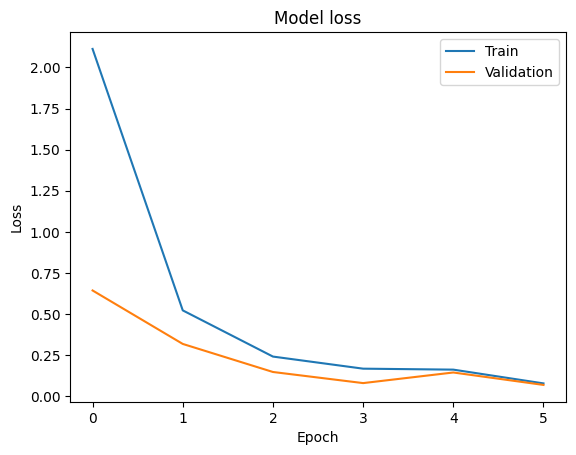

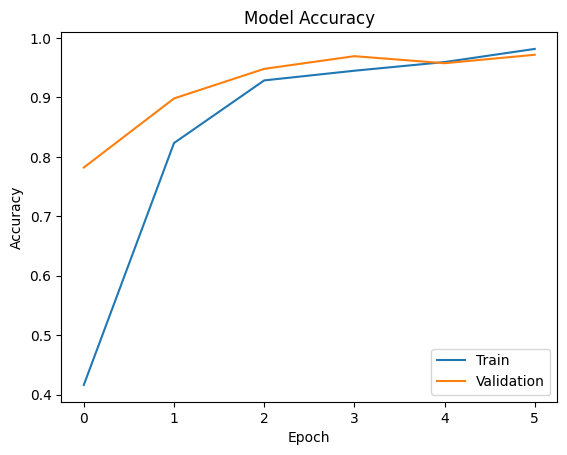

In [ ]:
# evaluate the model
loss = model.evaluate(validation_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

1/1 [==============================] - 0s 29ms/step


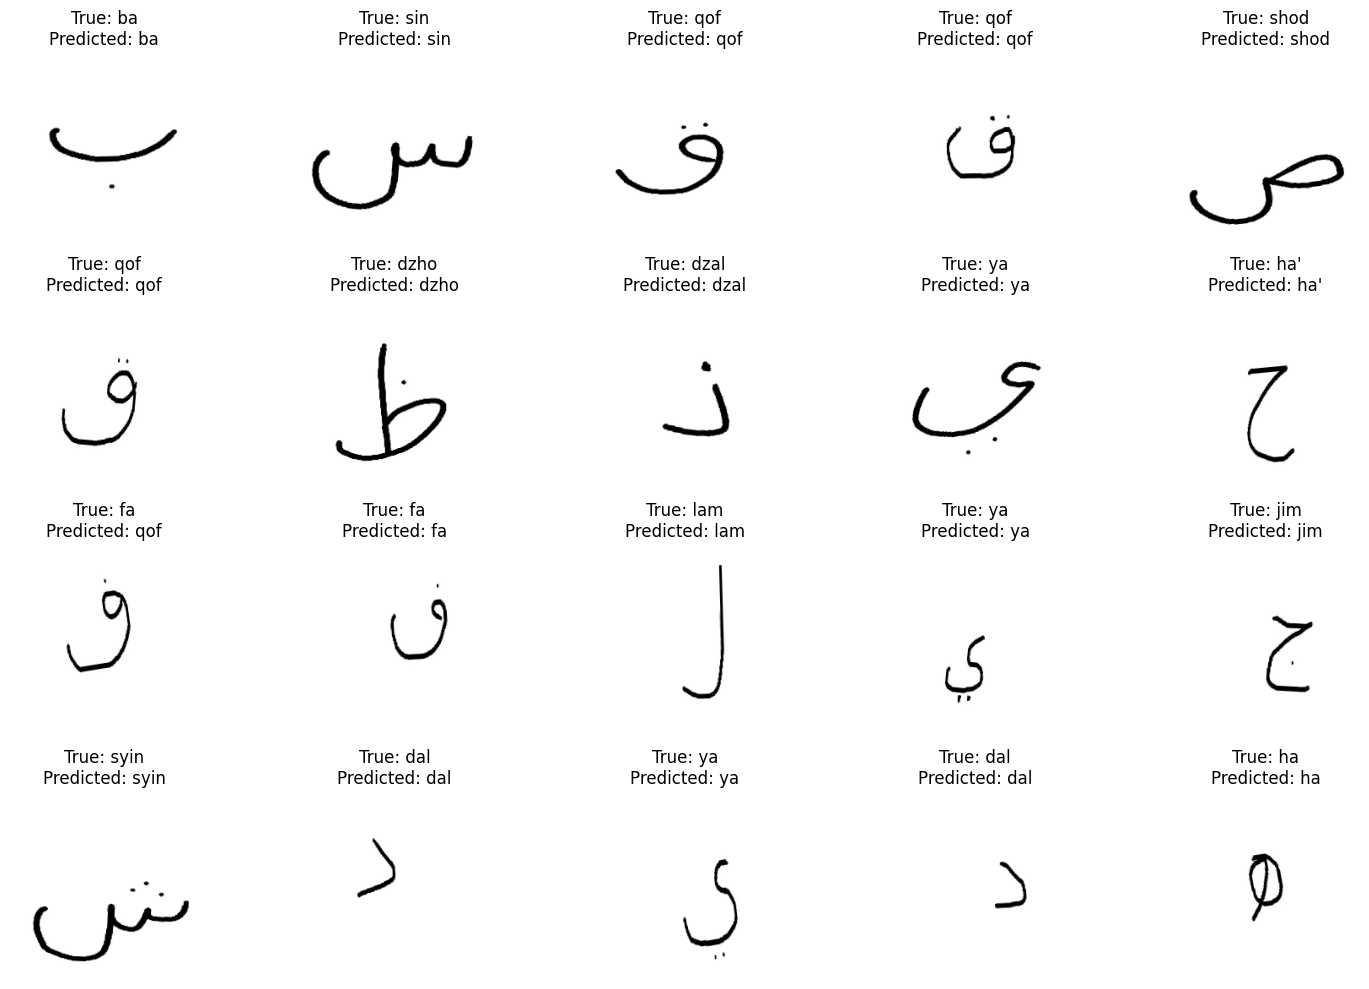

In [ ]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)

    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]

            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model to an H5 file
model.save('/content/drive/MyDrive/ML Task/ML Task/Model V9.2/Models 9.2/model_mm_v9_20.h5')

# Convert the model to TensorFlow Lite format
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/ML Task/ML Task/Model V9.2/Models 9.2/model_mm_v9_20.h5')

# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/ML Task/ML Task/Model V9.2/Models 9.2/model_mm_v9_20.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TensorFlow Lite format and saved as model.tflite")


Model has been successfully converted to TensorFlow Lite format and saved as model.tflite


In [ ]:
# uji model

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/ML Task/ML Task/Model V9.2/Models 9.2/model_mm_v9_20.h5"
final_model = tf.keras.models.load_model(MODEL_PATH)
print(f"Model loaded from {MODEL_PATH}")

Model loaded from /content/drive/MyDrive/ML Task/ML Task/Model V9.2/Models 9.2/model_mm_v9_20.h5


In [ ]:
# def preprocess_image_as_array(image_path, show_output=True):
#     im = Image.open(image_path).convert('RGB')
#     im = im.resize((224, 224))

#     if show_output:
#         plt.figure(figsize=(8, 8))
#         plt.imshow(im)
#         plt.axis('off')
#         plt.show()

#     return np.asarray(im)

# def predict_image_class(model, img_array, class_names):
#     img_batch = np.expand_dims(img_array, axis=0)
#     predictions = model.predict(img_batch)
#     predicted_class_index = np.argmax(predictions, axis=1)[0]

#     if predicted_class_index < len(class_names):
#         predicted_class = class_names[predicted_class_index]
#         print(f"Predicted class: {predicted_class}")
#         return predicted_class
#     else:
#         print(f"Predicted class index {predicted_class_index} out of range for class names")
#         return None


In [ ]:
data_path = '/content/drive/MyDrive/ML Task/ML Task/Model V9.2/dataset_v2/train'

In [2]:
# Fungsi preprocess image
def preprocess_image_as_array(image_path, show_output=True):
    im = Image.open(image_path).convert('RGB')
    im = im.resize((224, 224))

    if show_output:
        plt.figure(figsize=(8, 8))
        plt.imshow(im)
        plt.axis('off')
        plt.show()

    return np.asarray(im)

# Fungsi predict image class dan print skor untuk setiap kelas
def predict_image_class(model, img_array, class_names, threshold=0.5):
    img_batch = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_batch)[0]

    for idx, score in enumerate(predictions):
        print(f"{class_names[idx]}: {score:.4f}")

    predicted_class_index = np.argmax(predictions)
    predicted_class_score = predictions[predicted_class_index]
    predicted_class = class_names[predicted_class_index]

    if predicted_class_score >= threshold:
        print(f"\nPredicted class: {predicted_class} (confidence: {predicted_class_score:.4f})")
        return predicted_class
    else:
        print("\nGambar tidak valid.")
        return None

In [4]:
# Fungsi upload dan predict image
def upload_and_predict_image(model, class_names, threshold=0.5):
    uploaded = files.upload()
    for image_name in uploaded.keys():
        print(f"\nMemproses gambar: {image_name}")
        img_array = preprocess_image_as_array(image_name)
        predicted_class = predict_image_class(model, img_array, class_names, threshold)
        if predicted_class is not None:
            print(f"Kelas yang diprediksi untuk {image_name}: {predicted_class}")
        else:
            print(f"Gagal memprediksi kelas untuk {image_name}")

# Mengambil nama-nama kelas dari dataset pelatihan
class_names = sorted(os.listdir(data_path))

# Memanggil fungsi untuk mengunggah dan memprediksi gambar
upload_and_predict_image(final_model, class_names, threshold=0.5)

NameError: name 'os' is not defined

Class names: ['ain', 'alif', 'ba', 'dal', 'dhod', 'dzal', 'dzho', 'fa', 'ghoin', 'ha', "ha'", 'hamzah', 'jim', 'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof', 'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa', 'wawu', 'ya', 'zain']


Saving image_2024-06-19_102936370.png to image_2024-06-19_102936370.png

Processing image: image_2024-06-19_102936370.png


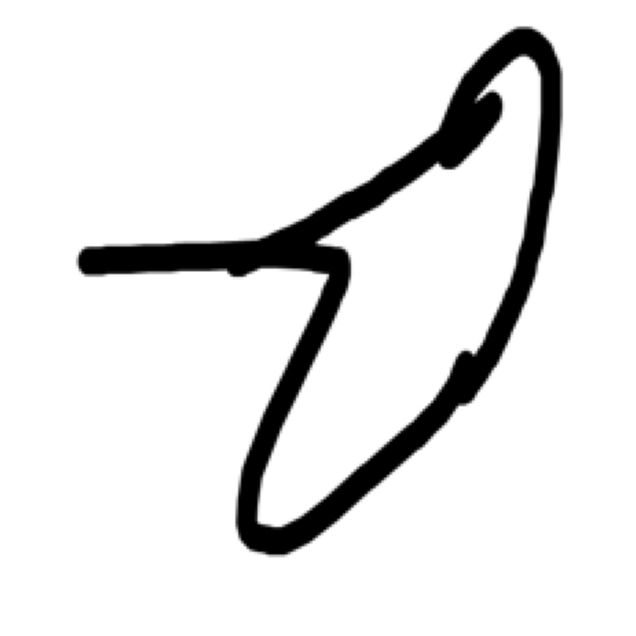

1/1 [==============================] - 0s 74ms/step
ain: 0.0004
alif: 0.0022
ba: 0.0001
dal: 0.0010
dhod: 0.0004
dzal: 0.0000
dzho: 0.0000
fa: 0.0000
ghoin: 0.0000
ha: 0.1284
ha': 0.2527
hamzah: 0.0003
jim: 0.0008
kaf: 0.0001
kho: 0.0001
lam: 0.0037
lamalif: 0.0056
mim: 0.3532
nun: 0.0001
qof: 0.0004
ro: 0.0007
shod: 0.0026
sin: 0.2192
syin: 0.0028
ta: 0.0000
tho: 0.0022
tsa: 0.0004
wawu: 0.0020
ya: 0.0208
zain: 0.0001

Predicted class: mim
Predicted class for image_2024-06-19_102936370.png: mim


In [ ]:

# # Preprocess image function
# def preprocess_image_as_array(image_path, show_output=True):
#     im = Image.open(image_path).convert('RGB')
#     im = im.resize((224, 224))

#     if show_output:
#         plt.figure(figsize=(8, 8))
#         plt.imshow(im)
#         plt.axis('off')
#         plt.show()

#     return np.asarray(im)

# # Predict image class and print scores for each class
# def predict_image_class(model, img_array, class_names):
#     img_batch = np.expand_dims(img_array, axis=0)
#     predictions = model.predict(img_batch)[0]  # Get predictions for the batch and take the first (and only) element

#     for idx, score in enumerate(predictions):
#         print(f"{class_names[idx]}: {score:.4f}")

#     predicted_class_index = np.argmax(predictions)
#     predicted_class = class_names[predicted_class_index]
#     print(f"\nPredicted class: {predicted_class}")
#     return predicted_class

# # Upload and predict function
# def upload_and_predict_image(model, class_names):
#     uploaded = files.upload()

#     for image_name in uploaded.keys():
#         print(f"\nProcessing image: {image_name}")
#         img_array = preprocess_image_as_array(image_name)
#         predicted_class = predict_image_class(model, img_array, class_names)
#         if predicted_class is not None:
#             print(f"Predicted class for {image_name}: {predicted_class}")
#         else:
#             print(f"Failed to predict class for {image_name}")

# # Mengambil class names dari dataset training
# # Harap pastikan ini adalah daftar nama kelas yang benar-benar digunakan dalam dataset Anda
# class_names = [ 'ain', 'alif', 'ba', 'dal', 'dhod', 'dzal',
#                 'dzho', 'fa', 'ghoin', 'ha', 'ha\'', 'hamzah', 'jim',
#                 'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof',
#                 'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa',
#                 'wawu', 'ya', 'zain']
# print(f"Class names: {class_names}")

# # Mengunggah dan memprediksi gambar
# upload_and_predict_image(final_model, class_names)